In [ ]:
# data = https://drive.google.com/file/d/1YqzNlm6CALrYxAeAzJ47egmWtdHTEBsW/view?usp=sharing

# source = https://finance.yahoo.com/quote/NVDA/history/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
import tensorflow as tf

In [ ]:
data = pd.read_csv('NVDA.csv', index_col=0 )
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01/03/2000,0.098438,0.099219,0.091927,0.097526,0.089453,300912000
01/04/2000,0.095833,0.096094,0.090104,0.094922,0.087065,300480000
01/05/2000,0.092188,0.093750,0.090495,0.091797,0.084199,188352000
01/06/2000,0.091797,0.091797,0.082292,0.085807,0.078704,120480000
01/07/2000,0.085417,0.088151,0.084115,0.087240,0.080019,71184000
...,...,...,...,...,...,...
05/23/2024,102.028000,106.320000,101.519997,103.799004,103.790482,835065000
05/24/2024,104.448997,106.474998,103.000000,106.469002,106.460258,429494000
05/28/2024,110.244003,114.939003,109.883003,113.901001,113.891647,652728000


<Axes: xlabel='Date'>

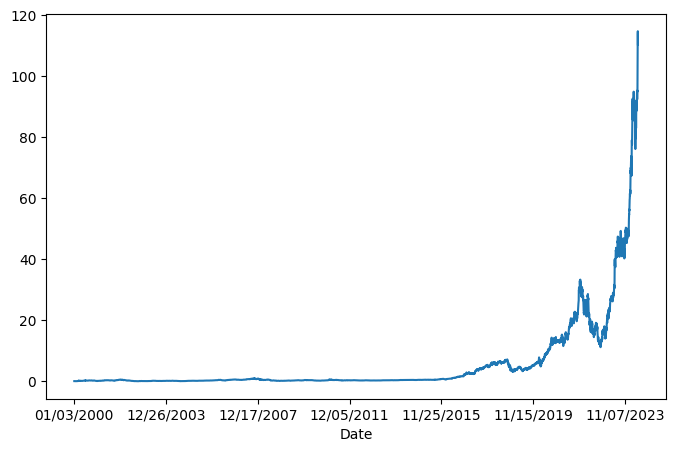

In [11]:
df['Close'].plot(figsize=(8, 5))

In [14]:
df['LogReturn'] = np.log(df['Close']).shift(1) - np.log(df['Close'])
df

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
01/03/2000,0.098438,0.099219,0.091927,0.097526,0.089453,300912000,NaN
01/04/2000,0.095833,0.096094,0.090104,0.094922,0.087065,300480000,0.027064
01/05/2000,0.092188,0.093750,0.090495,0.091797,0.084199,188352000,0.033476
01/06/2000,0.091797,0.091797,0.082292,0.085807,0.078704,120480000,0.067479
01/07/2000,0.085417,0.088151,0.084115,0.087240,0.080019,71184000,-0.016562
...,...,...,...,...,...,...,...
05/23/2024,102.028000,106.320000,101.519997,103.799004,103.790482,835065000,-0.089106
05/24/2024,104.448997,106.474998,103.000000,106.469002,106.460258,429494000,-0.025398
05/28/2024,110.244003,114.939003,109.883003,113.901001,113.891647,652728000,-0.067476


In [15]:
mu = df['LogReturn'].mean()
mu

-0.0011453830278206373

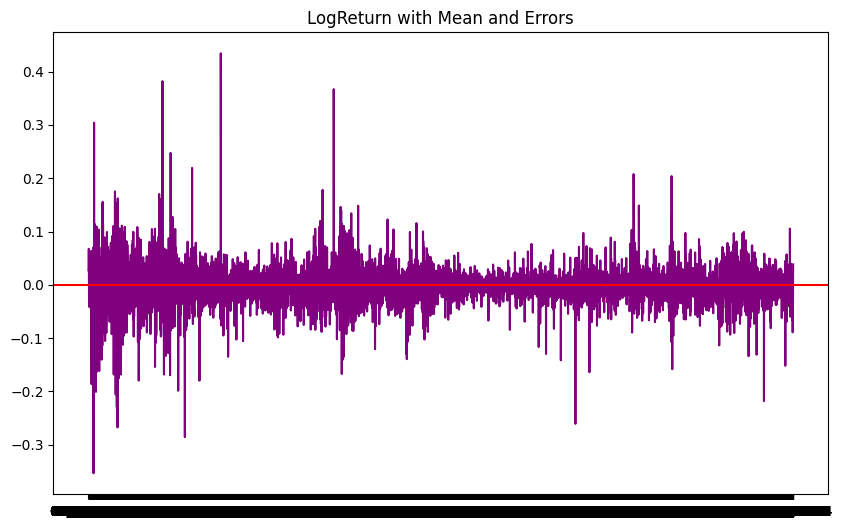

In [16]:
plt.figure(figsize=(10, 6))
plt.title('LogReturn with Mean and Errors')
plt.plot(df.index, df['LogReturn'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [59]:
data['Close']


Date
01/03/2000      0.097526
01/04/2000      0.094922
01/05/2000      0.091797
01/06/2000      0.085807
01/07/2000      0.087240
                 ...    
05/23/2024    103.799004
05/24/2024    106.469002
05/28/2024    113.901001
05/29/2024    114.824997
05/30/2024    110.500000
Name: Close, Length: 6141, dtype: float64

In [73]:
data1 = pd.read_csv('NVDA.csv')
df_new = data1[['Date','Close']]

df_new['Target-3'] = df_new['Close'].shift(3)
df_new['Target-2'] = df_new['Close'].shift(2)
df_new['Target-1'] = df_new['Close'].shift(1)
df_new['Target'] = df_new['Close']
df_new = df_new.drop(columns=['Close'])
df_new = df_new.drop(df_new.index[:3])
df_new = df_new.reset_index(drop=True)    #use this if data is in reverse chronological order
df_new

<ipython-input-73-27a890260951>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Target-3'] = df_new['Close'].shift(3)
<ipython-input-73-27a890260951>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Target-2'] = df_new['Close'].shift(2)
<ipython-input-73-27a890260951>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Date,Target-3,Target-2,Target-1,Target
0,01/06/2000,0.097526,0.094922,0.091797,0.085807
1,01/07/2000,0.094922,0.091797,0.085807,0.087240
2,01/10/2000,0.091797,0.085807,0.087240,0.090104
3,01/11/2000,0.085807,0.087240,0.090104,0.086458
4,01/12/2000,0.087240,0.090104,0.086458,0.084245
...,...,...,...,...,...
6133,05/23/2024,94.779999,95.386002,94.949997,103.799004
6134,05/24/2024,95.386002,94.949997,103.799004,106.469002
6135,05/28/2024,94.949997,103.799004,106.469002,113.901001
6136,05/29/2024,103.799004,106.469002,113.901001,114.824997


In [169]:
windowed_df = df_new[-253:].reset_index(drop=True)
windowed_df

,Date,Target-3,Target-2,Target-1,Target
0,05/30/2023,30.538000,37.980000,38.945999,40.111000
1,05/31/2023,37.980000,38.945999,40.111000,37.834000
2,06/01/2023,38.945999,40.111000,37.834000,39.770000
3,06/02/2023,40.111000,37.834000,39.770000,39.327000
4,06/05/2023,37.834000,39.770000,39.327000,39.171001
...,...,...,...,...,...
248,05/23/2024,94.779999,95.386002,94.949997,103.799004
249,05/24/2024,95.386002,94.949997,103.799004,106.469002
250,05/28/2024,94.949997,103.799004,106.469002,113.901001
251,05/29/2024,103.799004,106.469002,113.901001,114.824997


In [170]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((253,), (253, 3, 1), (253,))

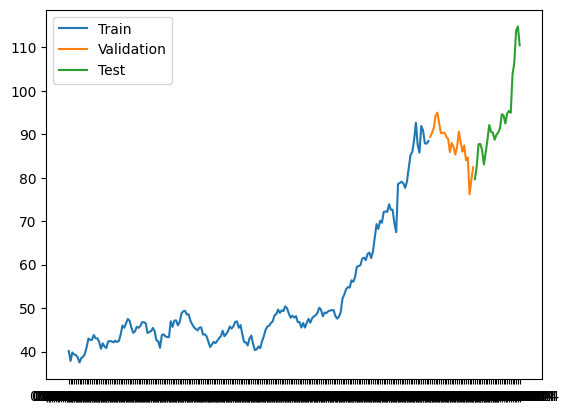

In [171]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]


plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [173]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 115ms/step - loss: 2788.7642 - mean_absolute_error: 51.1759 - val_loss: 7656.8330 - val_mean_absolute_error: 87.4026
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 2743.2781 - mean_absolute_error: 50.7217 - val_loss: 7581.1738 - val_mean_absolute_error: 86.9686
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 2691.4849 - mean_absolute_error: 50.2127 - val_loss: 7482.2886 - val_mean_absolute_error: 86.3982
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 2622.7979 - mean_absolute_error: 49.5126 - val_loss: 7346.1787 - val_mean_absolute_error: 85.6067
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 2525.3237 - mean_absolute_error: 48.5015 - val_loss: 7152.8193 - val_mean_absolute_error: 84.4696
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 2386.3347 - mean_absolute_error: 47.0558 - val_loss: 6884.1035 - val_mean_abs

7/7 [==============================] - 1s 3ms/step


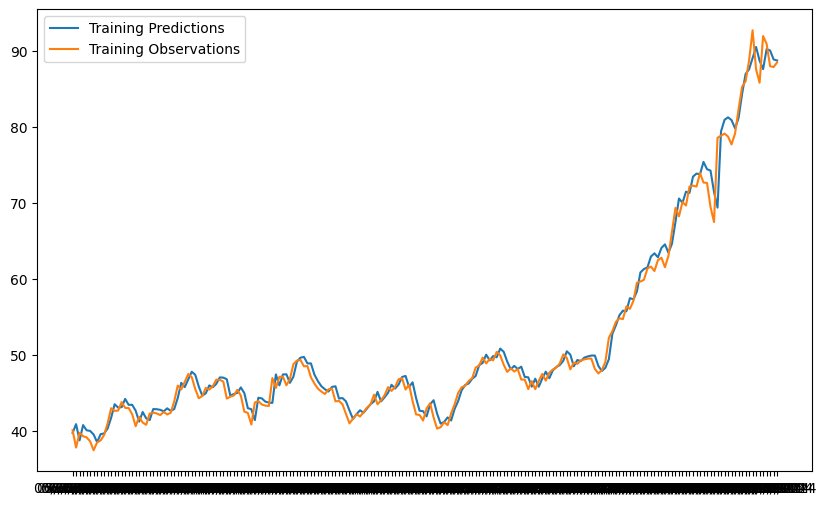

In [174]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize = (10,6))
plt.plot(dates_train, train_predictions, label='Training Predictions')
plt.plot(dates_train, y_train, label='Training Observations')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


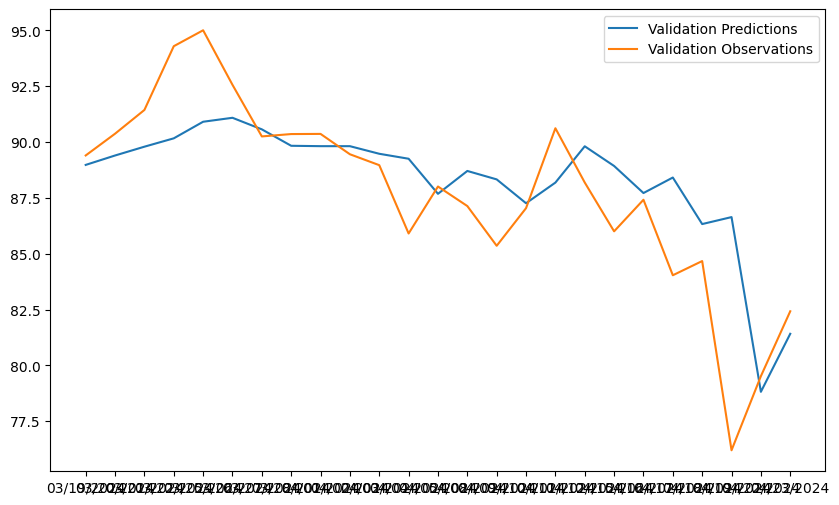

In [175]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize = (10,6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

1/1 [==============================] - 0s 26ms/step


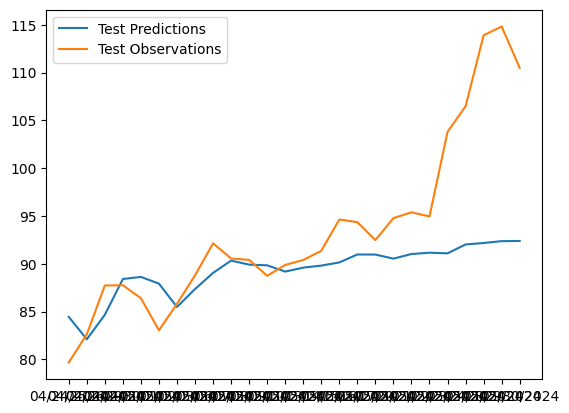

In [176]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions, label='Test Predictions')
plt.plot(dates_test, y_test, label='Test Observations')
plt.legend()
plt.show()

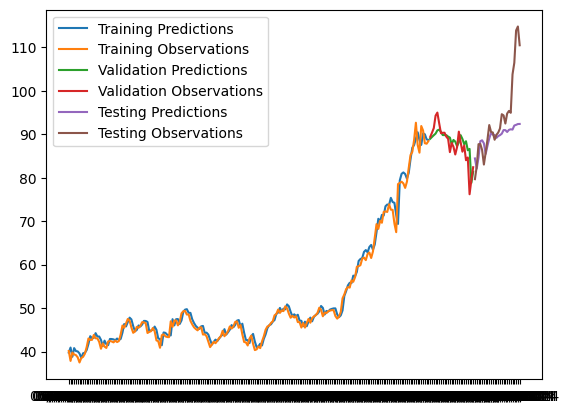

In [177]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

### Predict Next Day

In [ ]:
yesterday = X[-2:-1]
yesterday

In [ ]:
today = model.predict(yesterday).flatten()
today

In [ ]:
y_test[-1]